In [79]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name = "deepseek-r1-distill-llama-70b", temperature=0)

In [80]:
response = llm.invoke("What is the length of the Great Wall of China in kilometers?")

In [81]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China in kilometers. I remember hearing that it's a really long wall, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain about the exact number.\n\nFirst, I should probably consider where I might have heard about this before. Maybe in school or from a documentary. I recall that the Great Wall is one of the longest structures ever built, so it's definitely more than a thousand kilometers. But how much more?\n\nI think I've heard different numbers before. Some people say it's around 13,000 kilometers, while others claim it's longer, maybe even 21,000 kilometers. I'm not sure which one is correct. Maybe it depends on how they measure it—whether they include all the branches and sections or just the main part.\n\nI should also think about the history of the wall. It was built over many centuries, with different dynasties contributing to its co

In [82]:
from langchain.tools import tool

In [83]:
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

def add(a: int, b: int) -> int:
    """Add two numbers."""
    return a + b

def divide(a: int, b: int) -> float:
    """Divide two numbers."""
    
    if b==0:
        raise ValueError("Cannot divide by zero.")
    return a / b

In [84]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()

In [85]:
search.invoke("What is the latest news on AI?")

'AI News reports on the latest artificial intelligence news and insights. Explore industry trends from the frontline of AI. Artificial Intelligence News. Everything on AI including futuristic robots with artificial intelligence, computer models of human intelligence and more. Top 10 AI News Stories You Don\'t Want to Miss 1. OpenAI Launches Operator. Earlier today, we reported on OpenAI\'s rollout of Operator, an AI agent that handles tasks directly on the web. Currently available as a "research preview" for ChatGPT Pro users in the United States, Operator is designed to perform actions on websites, such as ... Reuters and AI, opens new tab; Reuters Leadership, opens new tab; ... Reuters, the news and media division of Thomson Reuters, is the world\'s largest multimedia news provider, reaching billions ... All the latest breaking news on Artificial Intelligence. Browse Newsweek archives of photos, videos and articles on Artificial Intelligence.'

In [86]:
tools = [multiply, add, divide, search]

In [87]:
llm_with_tools = llm.bind_tools(tools)

In [88]:
response = llm_with_tools.invoke("Hi")
response.content

'Hello! How can I assist you today?'

In [89]:
response.tool_calls

[]

In [90]:
response = llm_with_tools.invoke("What is 2+2?")
response.content

''

In [91]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'agzh44e7p',
  'type': 'tool_call'}]

In [92]:
response = llm_with_tools.invoke("What is 3/2?")
response.content

''

In [93]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 3, 'b': 2},
  'id': '6j38dpm1c',
  'type': 'tool_call'}]

In [94]:
response = llm_with_tools.invoke("What is the current age of the universe?")
response.content

''

In [95]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'current age of the universe 2023'},
  'id': '4fpmer1mx',
  'type': 'tool_call'}]

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

In [97]:
def function1():
    pass

In [ ]:
builder = StateGraph(MessagesState)

builder.add_node("Supervisor", function1)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "Supervisor")
builder.add_conditional_edges("Supervisor", tools_condition)
builder.add_edge("tools","Supervisor")

reactor = builder.compile()

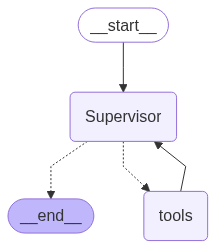

In [101]:
reactor